# Set 2 in Python

# NOTE: Problems 9, 13 and 15 are found at the end of the document

These problems were solved in pen and paper, and I haven't found out how to introduce page breaks on jupyter notebooks.

## Problem 8

### Task a

Intercept -10.632877043629678
MISSING_FROM -2.485612710659709
FROM_ADDR_WS -8.147264332970394
TVD_SPACE_RATIO -2.1763962666524432
LOTS_OF_MONEY 10.580239804951548
T_FILL_THIS_FORM_SHORT 13.754225429317858
Accuracy: 0.88
Perplexity: 1.553382408094676


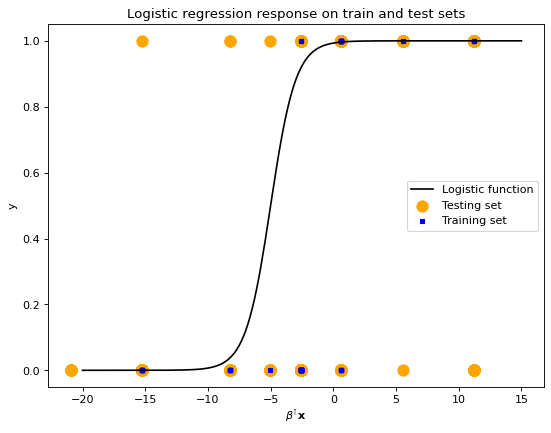

In [1]:
# Python with sklearn
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from sklearn import linear_model
# import statsmodels.formula.api as smf

# Fit the model (read the documentation for the meaning of various terms!)
def solve_ex1(penalty, C=1.0, logistic_lims = [-20, 15], logistic_center=-5):
    spam_train = pd.read_csv("../assets/spam_train.csv")
    spam_test = pd.read_csv("../assets/spam_test.csv")

    X_test = spam_test.loc[:, spam_test.columns != "SPAM"].to_numpy()
    X_train = spam_train.loc[:, spam_train.columns != "SPAM"].to_numpy()
    y_test = spam_test["SPAM"]
    y_train = spam_train["SPAM"]
    n = 1000

    clf = linear_model.LogisticRegression(penalty=penalty, C=C, solver="saga", max_iter = 1e6)
    clf.fit(spam_train.iloc[:,:5], spam_train.iloc[:,5])
    
    # log_reg = smf.logit("SPAM ~ MISSING_FROM + FROM_ADDR_WS + TVD_SPACE_RATIO + LOTS_OF_MONEY + T_FILL_THIS_FORM_SHORT", 
    #                   data = spam_train).fit(maxiter=1000)

    beta = clf.coef_[0]
    
    # beta = log_reg.params

    # Regression coefficients
    print("Intercept", clf.intercept_[0])
    for c, v in zip(spam_test.columns[:5], beta):
        print(c, v)

    # The predicted probabilities of y=1 on the test data
    phat = clf.predict_proba(spam_test.iloc[:,:5])[:,1]

    # Predicted classes from phat
    yhat = np.array(phat >= 0.5, dtype = int)

    # Determination of accuracy and perplexity
    accuracy = np.sum(y_test==yhat)/n
    print(f"Accuracy: {accuracy}")
    
    probs = np.zeros(1000)
    for i in range(1000):
        if y_test[i] == 1:
            probs[i] = phat[i]
        else:
            # The classes are mutually exclusive so phat(y=0|x)
            probs[i] = 1 - phat[i]
    perplexity = np.exp(-np.sum(np.log(probs))/n)
    print(f"Perplexity: {perplexity}")

    response_test = clf.intercept_[0] + np.matmul(beta, X_test.T)
    response_train = clf.intercept_[0] + np.matmul(beta, X_train.T)

    figure(figsize=(8, 6), dpi=80)
    x_logistic = np.linspace(logistic_lims[0], logistic_lims[1], 200)
    y_logistic = 1/(1 + np.exp(-(x_logistic - logistic_center)))
    plt.plot(x_logistic, y_logistic, color="black", label="Logistic function")
    plt.scatter(response_test, y_test, 100, color="orange", label="Testing set", marker="o")
    plt.scatter(response_train, y_train, 20, color="blue", label="Training set", marker="s")
    plt.title("Logistic regression response on train and test sets")
    plt.xlabel(r"$\beta^{\intercal}\mathbf{x}$")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    return

solve_ex1("none")

Intercept -4.8370338509244055
MISSING_FROM 9.038484653004202e-06
FROM_ADDR_WS -1.153433824069155
TVD_SPACE_RATIO 0.0
LOTS_OF_MONEY 2.284114798307852
T_FILL_THIS_FORM_SHORT 5.4488512185306215
Accuracy: 0.88
Perplexity: 1.3928556419406652


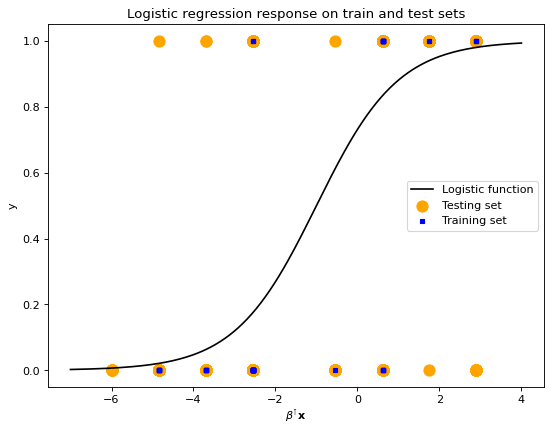

In [2]:
solve_ex1("l1", 3, [-7, 4], -1)

After implementing the lasso regression, we get pretty much the same test set accuracy but we lower the perplexity, which is a good indicator of better generalization performance.

# NOTE: PROBLEM 9 AT THE END OF THE DOCUMENT WITH PROBLEMS 13 AND 15

## Problem 10

### Task a

In [3]:
spam_train = pd.read_csv("../assets/spam_train.csv")
spam_test = pd.read_csv("../assets/spam_test.csv")

n = spam_train.shape[0]

spam_set = spam_train[spam_train["SPAM"] == 1]
ham_set = spam_train[spam_train["SPAM"] == 0]

attributes = ["MISSING_FROM", "FROM_ADDR_WS", "TVD_SPACE_RATIO", "LOTS_OF_MONEY", "T_FILL_THIS_FORM_SHORT"]

# Dictionaries to store the specific Bernoulli parameters for each class
attr_dict_spam = {
    "MISSING_FROM": 0,
    "FROM_ADDR_WS": 0,
    "TVD_SPACE_RATIO": 0,
    "LOTS_OF_MONEY": 0,
    "T_FILL_THIS_FORM_SHORT": 0
}

attr_dict_ham = {
    "MISSING_FROM": 0,
    "FROM_ADDR_WS": 0,
    "TVD_SPACE_RATIO": 0,
    "LOTS_OF_MONEY": 0,
    "T_FILL_THIS_FORM_SHORT": 0
}

p_spam = (spam_train["SPAM"].sum() + 1)/(n + 2)
print(f"Total spam p: {p_spam}")

for covariate in attributes:
    smoothed_x_spam = spam_set[covariate].sum()
    smoothed_x_ham = ham_set[covariate].sum()
    denom_spam = spam_set.shape[0] + 2
    denom_ham = ham_set.shape[0] + 2
    attr_dict_spam[covariate] = (smoothed_x_spam + 1)/ denom_spam
    attr_dict_ham[covariate] = (smoothed_x_ham + 1) / denom_ham

print(f"Bernoulli p when y=1: {attr_dict_spam}")
print(f"Bernoulli p when y=0: {attr_dict_ham}")

Total spam p: 0.27450980392156865
Bernoulli p when y=1: {'MISSING_FROM': 0.896551724137931, 'FROM_ADDR_WS': 0.10344827586206896, 'TVD_SPACE_RATIO': 0.034482758620689655, 'LOTS_OF_MONEY': 0.3793103448275862, 'T_FILL_THIS_FORM_SHORT': 0.8620689655172413}
Bernoulli p when y=0: {'MISSING_FROM': 0.8266666666666667, 'FROM_ADDR_WS': 0.17333333333333334, 'TVD_SPACE_RATIO': 0.2, 'LOTS_OF_MONEY': 0.6666666666666666, 'T_FILL_THIS_FORM_SHORT': 0.14666666666666667}


## Tasks b and c

The probability is given by:

$$P\left( y=1|\mathbf{x} \right) = \frac{P \left( \mathbf{x} | y=1 \right) P(y=1) }{\sum_{i=0}^1 P(\mathbf{x}|y=i)P(y=i) } $$

And since we're using the Naive Bayes assumption, we have:

$$P \left( \mathbf{x} | y=i \right) = P(x_1|y=i) \cdot P(x_2|y=i) \cdot P(x_3|y=i) \cdot P(x_4|y=i) \cdot P(x_5|y=i)$$

In [4]:
# List that gives the attribute probabilities when y=0 and y=1
dict_ham_spam = [attr_dict_ham, attr_dict_spam]

# Probabilities [P(y=0), P(y=1)]
p_ham_spam = [1-p_spam, p_spam]

def get_log_term(x, y_val=1):
    term = 0
    
    # log of the term to preserve numerical stability of probability multiplication
    for i in range(5):
        if x[i] == 1:
            # If the attribute value is 1, get its probability to be 1 given the value of y P(xi=1|y)
            term += np.log(dict_ham_spam[y_val][attributes[i]])
        else:
            # Else, get probability to be 0 given the value of y P(xi=0|y) = 1-P(xi=1|y)
            term += np.log(1 - dict_ham_spam[y_val][attributes[i]])
    
    # return log(P(x|y)*P(y=y))
    return term + np.log(p_ham_spam[y_val])

def calculate_prob(x):
    # Calculate the log of the numerator given y=1
    log_num = get_log_term(x, 1)
    
    # Calculate the sum of the denominator
    denom = 0
    for i in range(2):
        denom += np.exp(get_log_term(x, i))
    
    # Return the probability
    return np.exp(log_num) / denom

print(f"first: {calculate_prob([1, 0, 0, 1, 1])}")
print(f"second: {calculate_prob([1, 0, 1, 0, 0])}")
print(f"sixth: {calculate_prob([1, 0, 0, 1, 0])}")

first: 0.6423866274664978
second: 0.022574130941519974
sixth: 0.04707332952257519


### Task d

- Generative classifiers seek to maximize the joint probability P(\mathbf{x}, y), whereas discriminative classifiers try to maximize the conditional P(y|\mathbf{x})
- As a consequence from the previous point, the discriminative classifiers tend to be very task-specific, while the generative classifiers are able to generalize a bit more, albeit this is because some assumptions are made about the structure of the distribution (e.g. Naive Bayes assumption)
- As a result of generative models calculating the joint probability, they are also more resilient to missing data, as they can just marginalize over the missing data
- In general, discriminative classifiers have lower asymptotic error because they don't generalize, but generative classifiers converge to their asymptotic error faster (with less data)

For this specific dataset, the training set is composed of 100 datapoints. One could argue that this size is too small to train a performant spam classifier using a discriminative model, first seeing that the maximum accuracy we could get with such a model was of 88%, and second considering the amount of email that is processed every day. We would not like 1 out of every 10 non-spam emails that we receive to be sent to the spam folder, as they could carry important information, although arguably 1 out of 10 spam emails that we receive being classified as ham would be more tolerable.

Under the restriction of using this training set of 100 points, I would argue that a generative model would be better fit to classify new incoming spam emails. However, I would also remark that if we had access to a bigger dataset, with more emails similar to what a company would have to transfer every day, I would say that a discriminative model would be a better choice, since we have more data to achieve its lower asymptotic error, and we don't really need to generalize the task to things other than spam classification.

## Problem 11

### Task a

The authors claim that although discriminative classiﬁers are traditionally considered superior compared to generative classiﬁers because of their lower asymptotic error (the error rate of the classiﬁer as the sample size grows to inﬁnity), generative classiﬁers converge faster to their asymptotic error rate, and thus may have a higher accuracy on small sample sizes.

### Task b

Two models that are discussed in the article are continuous predictors, where priors $p(x_i|y)$ defined by normal distributions, and a discrete predictor, where each $p(x_i|y)$ is defined by a Bernoulli distribution. For continuous predictors, we talk about normal discriminant analysis (particularly, LDA with a diagonal covariance matrix) as a representative of generative models, while we use logistic regression for discriminative models. For the discrete case, we have Naive Bayes as a generative model and logistic regression as a discriminative model.

With predictors $\mathbf{x} = [x_1, x_2,\dots, x_p]$ and class labels $y$, the objective function $h_{Gen}$ that is maximized by the generative classifier, with relation to the parameter vector $\mathbf{\beta}$, is given by the joint likelihood $p(\mathbf{x}, y)$. On the other hand, $h_{Dis}$ in discriminative models maximizes the conditional likelihood $p(y|\mathbf{x}$ or 0-1 loss.

### Task c

It seems that in most of the data sets the error rate of the generative classiﬁers (Naive Bayes and normal discriminant analysis) does indeed initially decrease faster than the error rate of the logistic regression as the sample size grows, but logistic regression has a smaller error rate with higher sample sizes. However, with the smaller data sets the logistic regression does not catch up generative classiﬁers, because the sample size cannot be grown high enough to reach its asymptotic error rate. As suggested in the introduction, although discriminative classiﬁers have better asymptotic performance, generative classiﬁers may outperform them on smaller sample sizes.

## Problem 12

### Task a

No. The Naive Bayes assumption is that the input features are conditionally independent, or in other words:

$$P(x_1, x_2 | y) = P(x_1|y)\cdot P(x_2|y)$$

Taking $y=1$ and using Bayes' rule we can see:

$$P(x_1, x_2 | y) = \frac{P(y=1|x_1, x_2) P(x_1, x_2)}{P(y)}$$

And we know that $P(y=1 | x_1, x_2) = \sigma(1/2 + 2x_1 - x_2 - x_1x_2/2)$. Since there is an interaction term between $x_1$ and $x_2$, we cannot factorize this term, so therefore the assumption that the input features are conditionally independent does not apply.

### Task b


/home/vyeoms/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


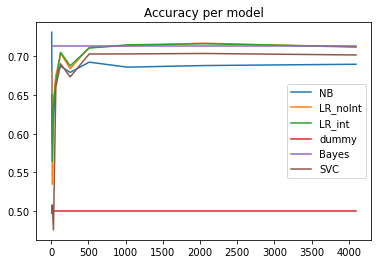

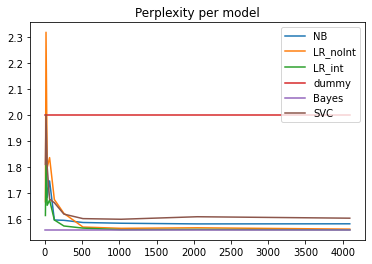

,NB,LR_noInt,LR_int,dummy,Bayes,SVC
8,0.731290,0.680687,0.650504,0.5,0.713687,0.497274
16,0.587547,0.534593,0.564184,0.5,0.713687,0.507906
32,0.617443,0.643135,0.635347,0.5,0.713687,0.475510
64,0.674706,0.674377,0.666088,0.5,0.713687,0.660580
128,0.687376,0.704409,0.705277,0.5,0.713687,0.690425
256,0.679318,0.684139,0.687772,0.5,0.713687,0.673513
512,0.692610,0.711805,0.710757,0.5,0.713687,0.703138
1024,0.686109,0.713729,0.715011,0.5,0.713687,0.703233
2048,0.688190,0.717128,0.716428,0.5,0.713687,0.703819
4096,0.689871,0.711904,0.712653,0.5,0.713687,0.701887


In [5]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC # Chosen extra classifier

def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def theo_prob(x1, x2):
    return sigmoid( 0.5 + 2*x1 - x2 - 0.5*x1*x2 )

ns = [ 2**i for i in range(3,13) ]
data = [ pd.read_csv(f'../assets/toy_train_{n}.csv') for n in ns ]
data_test = pd.read_csv("../assets/toy_test.csv")
y_test = data_test.iloc[:,2]

# probabilities of ones
phat = lambda m: [
  m.fit(d.iloc[:,:2],d.iloc[:,2]).predict_proba(data_test.iloc[:,:2])[:,1]
  for d in data ]

# accuracy and perplexity given probability of 1s in the test data
acc = lambda p: (y_test*p+(1-y_test)*(1-p)).mean()
perp = lambda p: np.exp(-np.mean(np.log(y_test * p+(1-y_test)*(1 - p))))

# models to be used
m_NB = GaussianNB()
m_LR_noInt = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LogisticRegression(fit_intercept=False))])
m_LR_int = Pipeline([('poly', PolynomialFeatures(degree=3, interaction_only=True)), ('linear', LogisticRegression(fit_intercept=False))])
m_dummy = DummyClassifier(strategy = "uniform")
m_svc = SVC(kernel="rbf", probability=True)

theo_phat = [theo_prob(data_test["x1"], data_test["x2"])] * 10

# Store results in a pandas dataframe
res_acc = pd.DataFrame(index=ns)
res_perp = pd.DataFrame(index=ns)
res_acc["NB"] = [ acc(p) for p in phat(m_NB) ]
res_perp["NB"] = [ perp(p) for p in phat(m_NB) ]

res_acc["LR_noInt"] = [ acc(p) for p in phat(m_LR_noInt) ]
res_perp["LR_noInt"] = [ perp(p) for p in phat(m_LR_noInt) ]

res_acc["LR_int"] = [ acc(p) for p in phat(m_LR_int) ]
res_perp["LR_int"] = [ perp(p) for p in phat(m_LR_int) ]

res_acc["dummy"] = [ acc(p) for p in phat(m_dummy) ]
res_perp["dummy"] = [ perp(p) for p in phat(m_dummy) ]

res_acc["Bayes"] = [ acc(p) for p in theo_phat ]
res_perp["Bayes"] = [ perp(p) for p in theo_phat ]

res_acc["SVC"] = [ acc(p) for p in phat(m_svc) ]
res_perp["SVC"] = [ perp(p) for p in phat(m_svc) ]

for col in res_acc:
    plt.plot(res_acc[col], label=col)
plt.legend()
plt.title("Accuracy per model")
plt.show()

for col in res_perp:
    plt.plot(res_perp[col], label=col)
plt.legend()
plt.title("Perplexity per model")
plt.show()

res_acc

In [6]:
res_perp

,NB,LR_noInt,LR_int,dummy,Bayes,SVC
8,inf,1.666894,1.614058,2.0,1.558743,1.810350
16,1.921385,2.317568,1.831468,2.0,1.558743,2.001075
32,1.683344,1.798220,1.653306,2.0,1.558743,1.800933
64,1.746827,1.836323,1.673705,2.0,1.558743,1.676985
128,1.596874,1.675309,1.597006,2.0,1.558743,1.663131
256,1.595571,1.622262,1.573822,2.0,1.558743,1.619423
512,1.587207,1.569814,1.565723,2.0,1.558743,1.602103
1024,1.584385,1.564840,1.559703,2.0,1.558743,1.599677
2048,1.581807,1.566920,1.560573,2.0,1.558743,1.609323
4096,1.582219,1.561812,1.559026,2.0,1.558743,1.603787


### Task c



In [7]:
m_LR_int = Pipeline([('poly', PolynomialFeatures(degree=3, interaction_only=True)), ('linear', LogisticRegression(fit_intercept=False))])

fit_model = m_LR_int.fit(data[-1].iloc[:, :2], data[-1].iloc[:,2])
coefs = fit_model.named_steps["linear"].coef_[0]

print("Logistic regression coefficients:", coefs)
print("In order of intercept, x1, x2, x1*x2")

Logistic regression coefficients: [ 0.45403271  1.97204505 -0.98529549 -0.4296936 ]
In order of intercept, x1, x2, x1*x2


The coefficients obtained are relatively close to the ones from the theoretical model:

|             | intercept | x1 | x2 | x1*x2 |
|-------------|-----------|----|----|-------|
| Theoretical | 0.5       | 2  | -1 | -0.5  |
| Regression  | 0.45403271|  1.97204505  |  -0.98529549  |   -0.4296936    |

The biggest absolute difference is found in the interaction term, of about 0.7, which is an error of about 14%.

- Both versions of logistic regression - with interaction and without interaction terms - are examples of probabilistic, discriminative models. The Naive Bayes classifier is a generative classifier. The Bayes classifier is the ground truth, but it also is categorized as a generative classifier as it seeks to establish a conditional relationship between the prediction and the input parameters. The support vector classifier is a probabilistic, discriminative classifier.
- The accuracy of the logistic regression without interaction terms, logistic regression with interaction terms and the theoretical Bayes estimator are all very close when the training dataset size is big, but the discriminative classifiers perform much worse at smaller training sets. The SVC also has an accuracy on the same magnitude as the theoretical Bayes classifier, although it is a bit lower than the regression models. The Naive Bayes classifier has better performance than the discriminative classifiers at small training set sizes, but we can see that it reaches a value of accuracy of around 0.68 with the dataset of size 64 and doesn't change much from there onward.
- Similarly to the accuracy, the discriminative models reach values of perplexity close to the theoretical Bayes model when the dataset size is big and they have high perplexity with small datasets, while the Naive Bayes classifier converges to a stable value of perplexity at around size 64. The NB has "infininite" perplexity with the smallest dataset size, which may be due to the model producing a classification with probability 0 or 1 due to strong beliefs encoded on the model with small datasets.
- Yes: Initially, the NB classifier performs much better than both cases of logistic regression when the datasets are small. However, we can see that its improvement w.r.t. dataset size isn't as big as with regression. This is because it reaches its asymptotic error faster, while the regression models have lower asymptotic error but need more data to reach it. We can see that the discriminative models overcome the NB classifier in terms of accuracy once the dataset reaches a certain size.
- Because the structure of the original model is the same as the logistic regression's model with interaction terms. This means that its asymptotic error should be zero, but we would need a lot of data to reach that point.
- The Naive Bayes classifier has a slightly better accuracy than the theoretical Bayesian model at dataset size 8. This is also observed in some cases with the logistic regression models, and this could be induced by the dataset size. It was discussed with a TA that the theoretical boundary given by the Bayes error (or irreducible error) applies when we have infinite data, and we may see deviations from this theory with limited datasets.
- Although no model has lower accuracy than the model, the SVC and the logistic regression with no interaction terms have higher perplexity than the dummy at small dataset sizes. This can be explained by the need of these two models of more training data to be able to capture the structure of the data distribution and describe it better.

<div style="page-break-after: always;"></div>

# NOTE: PROBLEM 13 AT THE END OF THE DOCUMENT WITH PROBLEMS 9 AND 15

## Problem 14 

In this task, you will apply the *k-nearest neighbour* ($k$-NN) classifier by hand on a toy data set. You should be able to do this with pen and paper.

We will use the training dataset $D=\{(x_i,c_i)\}_{i=1}^{14}$, shown below, where $x_i\in{\mathbb{R}}$ are the covariates and $c_i\in\{-1,+1\}$ are the classes. 

$$
  \begin{array}{r|rrrrrrrrrrrrrr}
  i  &1   &2   &3   &4   &5   &6   &7   &8   &9   &10  &11  &12  &13  &14\\\hline
  x_i&0.0 &2.0 &3.0 &5.0 &6.0 &8.0 &9.0 &12.0&13.0&15.0&16.0&18.0&19.0&21.0\\
  c_i&+1  &+1  &+1  &-1  &+1  &+1  &+1  &-1  &-1  &-1  &+1  &-1  &-1  &-1
  \end{array}
$$

### Task a

The classification boundary in k-NN is defined by the points in space where the distance metric on a data point determines a change in the majority of points in the training set cause a change in classification. A simple example in this case can be seen with a nearest-neighbor (k=1) classification. We can see with $x_3$ and $x_4$; if we have $x=3.5$, we would classify this point with $+1$ because it is closest to $x_3$, and if we had $x=4.5$, we would classify it as $-1$ because it is closer to $x_4$. In general, this transition is marked by the average of the smallest neighbor's value before the class transition and the largest neighbor's value after the class transition (because this is equidistant between those values, this marks a change in the k nearest neighbors). Take the 3-NN case with $x_6$, $x_7$, $x_8$ and $x_9$. The boundary in this case would be defined by $\frac{x_6 + x_9}{2} = \frac{21}{2} = 10.5$, since we have a classification of $+1$ if $x<10.5$ and $-1$ if $x>10.5$.

With all this laid out, we can specify the classification boundaries for $k=1$ as the set:

$$x_{bound, k=1} = \{ 4, 5.5, 10.5, 15.5, 17 \}$$

And the training error is always 0 for $k=1$ since we're classifying each datapoint with its own class.

For $k=3$ we have:

$$x_{bound, k=3} = \{ 10.5 \}$$

$x_4$ and $x_{11}$ have different values from their surrounding neighbors, but they don't cause a majority change since they're only 1 out of 3. The only class majority change happens between $x_{7}$ and $x_8$ at 10.5 as defined before.

We have that when $k=3$ the only training points that are misclassified are $x_4$ and $x_{11}$, which yields a training error of $\frac{2}{14} \approx 0.14$.

### Task b

Figure 2.16 from James et al. shows a good visualization of what happens on both cases:

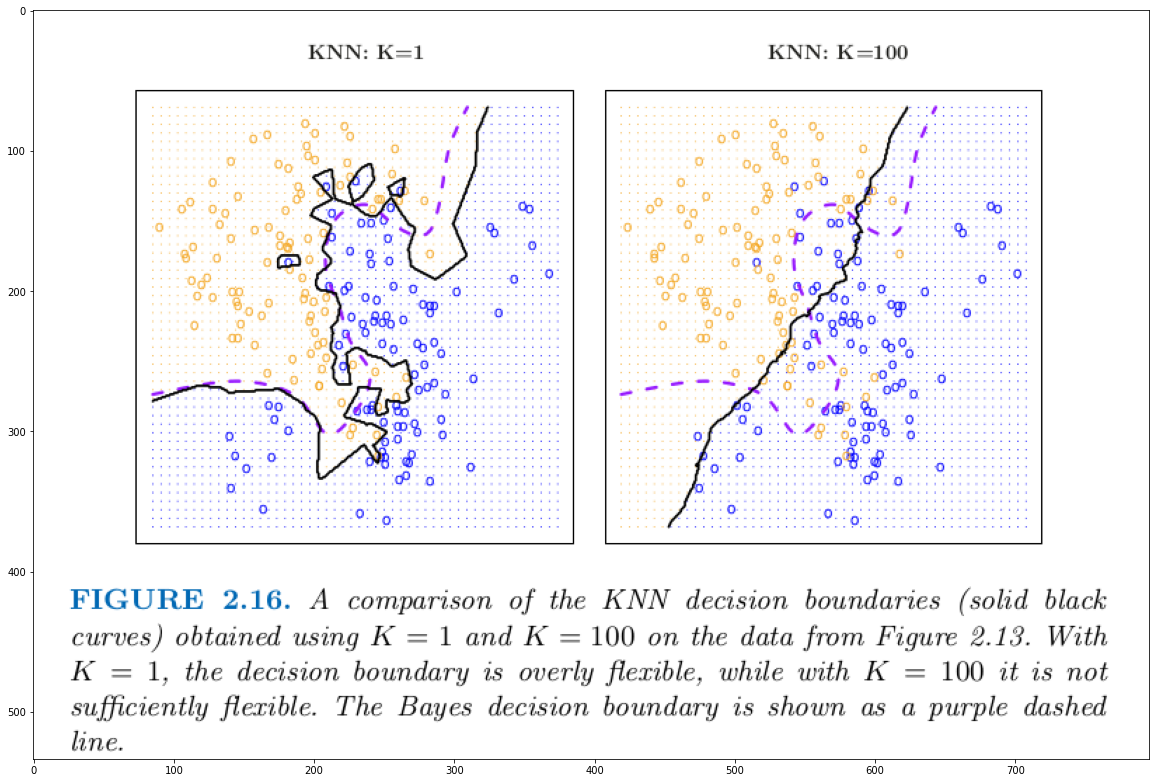

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('../assets/knn_illustration.png')

plt.figure(figsize = (20,20))
plt.imshow(img)


We can see that when $k=1$, the model overfits the boundary to the training data, generating "pockets" that clearly are overly specific to a single point. This is a bad sign for the generalization capability of the model; in other words, 1-NN has high variance.

On the other hand, with a big value of $k$ the boundary starts to resemle a line, as the class majority that defines the boundary just starts to become a smoothed average over the classification space. This means that the model has high bias and low variance.

In general, a k-NN model with an intermediate value is more desirable.

<div style="page-break-after: always;"></div>

# NOTE: PROBLEM 15 AT THE END OF THE DOCUMENT WITH PROBLEMS 9 AND 13

## Problem 16

With the topics covered in lectures 5-8 and this exercise set, I understand well the difference between generative and discriminative models, as well as their respective strengths and weaknesses. Also, while I understand better how decision trees are formed, the generation of *different* trees to generate a random forest doesn't seem so clear to me, since we would generally create a greedy decision with some metric, like Gini, to create a split. It feels like the splits should stay mostly the same for the same dataset, so I have issues seeing how this improves performance.

With the exercises I also have gathered better understanding of k-NN; being able to see the effect of the choice of k on the decision boundary as seen with the book and the practical example helped me understand how it relates to the bias-variance tradeoff.